# Introduction
In laboratories we interact with a lot of instruments on which to collect data. We will write a programme to read in real data from an instrument and plot it.

# Exercise

In this mini project we will load and manipulate a file of UV data. Once loaded we will also perform simple data manipulations.

Note that loading data files can be made simpler if using some scientific libraries. However, these libraries assume certain conventional formats for presenting data. A lot of scientific data is generated in unexpected formats as is the case in this exercise. Your objective should be to try to understand the format of the data and design a parser accordingly.

Tip: A **parser** is a piece of code that takes data supplied by the user and splits it up into appropriate variables and data types. It parses the data in a similar way to how we parse language

# Learning Outcomes

    Read in text files
    Plot data
    Simple data analysis

# Reading the file

First we will load a file. **Make sure that the file you want to load is in the same folder as your Python notebook or script.** Here, we will use the recommended `with` statement, which is used to open files. When the `with` block is over, the file is closed by Python. If unsure go back and look at Tutorial 2 where file opening and closing was covered.

```python
# store the name of the file to read
file_name = "proj_1.csv"
# open the file. you can now access its contents referring to it as "in_file"
with open(file_name, 'r') as in_file:
    # you can iterate through a file as if it were a list
    for line in in_file:
        # here, we have access to each line of the file as a string
        print(line)
```

In [13]:
# store the name of the file to read
file_name = "proj_1.csv"
# open the file. you can now access its contents referring to it as "in_file"
with open(file_name, 'r') as in_file:
    # you can iterate through a file as if it were a list
    for line in in_file:
        # here, we have access to each line of the file as a string
        print(line)

Title, Iodine

Comment, 

Date, 19/02/2018 14:33:52 

Operator, 

System Name, Undefined

Wavelength(nm),Baseline,Wavelength(nm),iodine_sample,

500,0.00714,500,0.19751

500.05,0.00712,500.05,0.19793

500.1,0.00711,500.1,0.19788

500.15,0.00709,500.15,0.19811

500.2,0.00707,500.2,0.19812

500.25,0.00706,500.25,0.19816

500.3,0.00704,500.3,0.19841

500.35,0.00702,500.35,0.19816

500.4,0.00701,500.4,0.19826

500.45,0.00699,500.45,0.19816

500.5,0.00698,500.5,0.19845

500.55,0.00698,500.55,0.19842

500.6,0.00698,500.6,0.19833

500.65,0.00698,500.65,0.19857

500.7,0.00699,500.7,0.19872

500.75,0.00699,500.75,0.19869

500.8,0.00699,500.8,0.19885

500.85,0.00699,500.85,0.19885

500.9,0.00699,500.9,0.19876

500.95,0.00699,500.95,0.19871

501,0.00699,501,0.19892

501.05,0.007,501.05,0.19897

501.1,0.007,501.1,0.19906

501.15,0.00699,501.15,0.19929

501.2,0.00698,501.2,0.19953

501.25,0.00697,501.25,0.1995

501.3,0.00695,501.3,0.19964

501.35,0.00694,501.35,0.19948

501.4,0.00693,501.4,0.19945


You should have seen the contents of the file printed out. Open the same file in Notepad and in Excel and compare how they look to make sure that all the data is really read in by Python.

Let's check we understand the structure of this file:
First there are several lines without data in them. These are header lines which contain useful information, such as a title for the data and when the data is taken.
These are **metadata** and are really important for managing and understanding data **[part of the FAIR data principles](https://www.go-fair.org/fair-principles/)**

The final non-data line tells us what each column of data is.
Then we have a long list of data values, four columns separated by commas.
From the column titles we can say that there are a background spectrum and an iodine spectrum.

# Parsing the data

Using the code above, you can access each line of the file as a string.

Typically, data stored in text files is split using a character called a **separator** or a **delimiter**.

Common delimiters you will come across are:
- commas, usually in a .csv file which stands for comma separated value (it is also not just for Excel)
- tabs, sometimes (though rare) in a .tsv file
- spaces, often a fixed number
- semi-colon

How to deal with these?

For instance, take the following string:

`"hydrogen;helium;lithium"`

each part of the string is separated using the separator `";"`.

Thankfully, Python has a built-in function to easily separate strings based on their separator:

```python
line = "hydrogen;helium;lithium"

# turn the string into a list of strings separated at ";"
split_line = line.split(";")

# we can now print the list of each element name, or choose specific element names using indexing
print(split_line)
print(split_line[1])
```

In [6]:
line = "hydrogen;helium;lithium"
split_line = line.split(";")
print(split_line)
print(split_line[1])


['hydrogen', 'helium', 'lithium']
helium


Note that you can change the separator of the `split()` function by replacing the argument of the function with any string. So you could have `split(",")` or `split(".")` or even `split("pineapple")`. If you don't give any argument, `split()` will split the string by spaces. Try to write a code that splits the following string and adds all the numbers together:

`"1.23   3.55      5.22"`

In [15]:
numbers = "1.23 3.55 5.22"
split_numbers = numbers.split()
sum = 0
for x in split_numbers:
    print(float(x))
    sum = sum + float(x)
print(sum)

1.23
3.55
5.22
10.0


# Plotting

For the last stage of your mini-project, you will need to visualise some of the data from the `.csv` file as a plot. Python has a powerful visualisation library called `matplotlib`.

As a simple example, this is how to produce a line plot:

```python
import matplotlib.pyplot as plt
# we will plot a population percentage vs time
population = [100, 50, 25, 12, 6]
time = [0, 10, 20, 30, 40]

# the following line creates the ax object, which has many functions for plotting data
fig, ax = plt.subplots()
# the plot() function makes a line plot
ax.plot(time,population)

# show the figure in the notebook
plt.show()
```

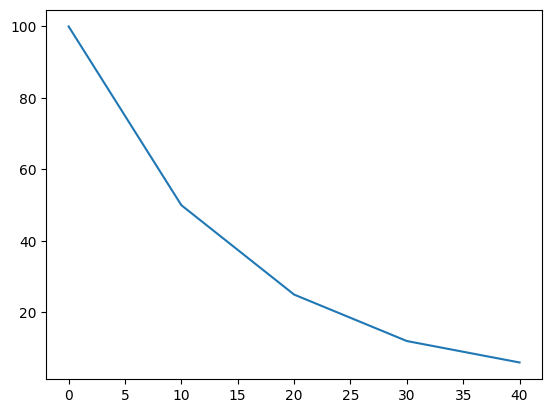

In [6]:
import matplotlib.pyplot as plt
population = [100,50,25,12,6]
time = [0,10,20,30,40]
fig, ax = plt.subplots()
ax.plot(time,population)
plt.show()

To save a high-quality image, instead of `plt.show()`, you could use `plt.savefig("figure_name.pdf")`.

Of course, the figure above doesn't yet match scientific quality. It is up to you to look up how to add axis labels in `matplotlib`. The documentation for this library is very comprehensive, so for instance if you wanted to make a scatter plot instead of a line plot, it may help to read up on `ax.scatter()` ([link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)).

# Main exercises

## Exercise 1: Read in Spectrum

It is time to put all of these new skills to use.

Open a new file in your favourite code editor (VSCode, Spyder, Sublime etc.). Write a Python script that reads in the iodine spectrum data from `proj_1.csv` and plots it.

General advice:
- You will need to make empty lists before your `for` loop, so that you can append the relevant numbers to these lists.
- A lot of lines from the `.csv` file don't have any spectral data. You will have to make sure that your code ignores those lines when it imports the data.
- The header lines do contain information on the experiment that might be useful, think of how you could store these.

Key points:
- Make sure you plot is of scientific quality and could be submitted with a lab report.

To start use comments to construct the outline of your script. An outline is provided below

Header information:
{'Title': 'Iodine', 'Comment': '', 'Date': '19/02/2018 14:33:52', 'Operator': '', 'System Name': 'Undefined', 'Wavelength(nm)': 'Baseline'}
Title:Iodine
Comment:
Date:19/02/2018 14:33:52
Operator:
System Name:Undefined
Wavelength(nm):Baseline


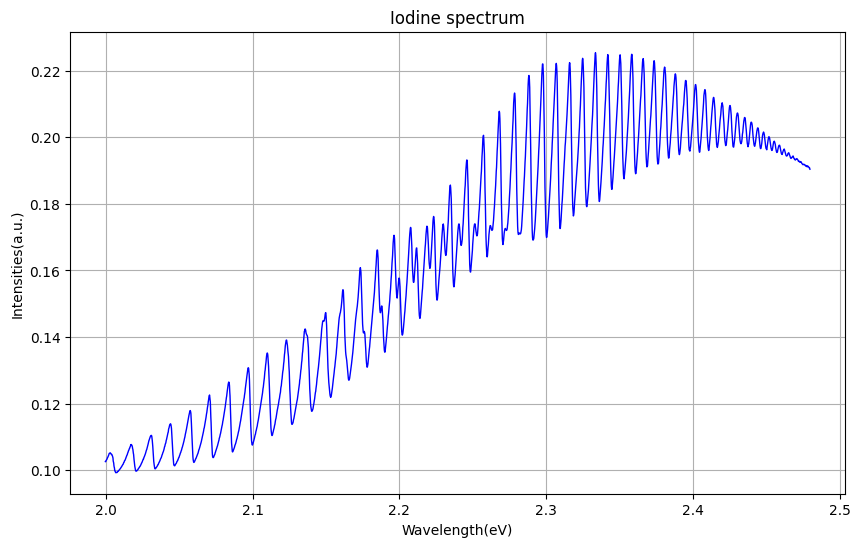

In [20]:
'''
CSV file is an easy way to store data, data is separated by comma
'''
#First of all we need import package we need
import matplotlib.pyplot as plt #package used to plot graph
import numpy #package that can carry out maths calculation
import csv #import csv to read the csv file

#We need to read our file now, but we have to point out the location of the file
file_path = r"C:\Users\13822\Desktop\CHEM0062\Project 1\proj_1.csv"
#notice that I put an 'r' at the front, this is because the path contains '\' which has specific meaning in python
output_file = 'processed_proj_1.csv'
#if we are plotting a graph of intensity against wavelength, we need to lists to store the data
wavelengths = []
intensities = []

# Header 
header_info = {}

#now we can read our file
with open(file_path,'r') as file: #'r'means only read the file without editing it 
    reader = csv.reader(file)
    
    #once we have read the file,we can search our data now
    for row in reader:
        try:#we use try here because headers are not float
            wavelength = 1239.84/(float(row[0]))
            intensity = float(row[3])-float(row[1]) #row 3 is the measured intensity, we need to minus the baseline
            
            wavelengths.append(wavelength)
            intensities.append(intensity)
            
        except ValueError:
            if len(row)>1:
                key = row[0].strip()
                value = row[1].strip()
                header_info[key]=value

with open(output_file,'w',newline='') as file:
    writer = csv.writer(file)
    
    for key,value in header_info.items():
        writer.writerow([f'#{key}:{value}'])
        
    for w, i in zip(wavelengths,intensities):
        writer.writerow([w,i])

print("Header information:")
print(header_info)
for key,value in header_info.items():
    print(f"{key}:{value}")

plt.figure(figsize=(10,6))
plt.plot(wavelengths,intensities,color='blue',linewidth=1)

plt.title('Iodine spectrum')
plt.xlabel('Wavelength(eV)')
plt.ylabel("Intensities(a.u.)")
plt.grid(True)

plt.show()


# Further exercises
## Exercise 2: Different formats
Try to load data from the different files `proj_2.txt` and `proj_3.dat`. These use different delimiters and header formats. 

**Hint:** look at the files first.

## Exercise 3: Data analysis
You are currently plotting wavelength data. For some applications, it would be better to visualise energies instead. Plot the data in `eV` instead of `nm`.
**Hint:** The conversion is $$eV = \frac{1239.84}{nm}$$

## Exercise 4: Writing data
Now the data has been converted into a different x scale see if you can save that out as a new file. You may need to remember how to use the `write()` function from Tutorial 2.